<a href="https://colab.research.google.com/github/Joseph89155/Bert-sentence-similarity/blob/main/Semantic_Sentence_Similarity_using_BERT_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Natural Language Processing with Transformers
### Project: Sentence Similarity Detection using BERT Embeddings

## 📌 Overview
In this project, we explore how **contextual word embeddings** from a pre-trained BERT model can be used to measure **semantic similarity** between pairs of sentences. We use **Hugging Face Transformers** to load the `bert-base-uncased` model and compute embeddings, and **cosine similarity** to quantify sentence closeness.

Unlike traditional NLP techniques such as Bag of Words or TF-IDF, which use fixed word representations, BERT dynamically adjusts embeddings based on surrounding context—enabling it to capture subtle meaning differences (e.g., polysemy).

## 🌍 Real-World Application
Sentence similarity detection has wide real-world applications in:
- **Search engines**: Matching user queries to relevant documents
- **Plagiarism detection**: Checking if text has been rephrased
- **Chatbots**: Interpreting user input with similar intent
- **Duplicate question detection**: Like on Stack Overflow or Quora
- **Customer service AI**: Recognizing variations in user complaints

Through this project, we demonstrate how transformers, specifically BERT, outperform traditional methods by incorporating **contextual awareness**, making NLP models more robust and intelligent.

## 🛠️ Tools & Libraries
- `transformers` (Hugging Face)
- `tensorflow` (TFBertModel)
- `numpy`, `scipy`, `sklearn`


### Step 1: Load required libraries

In [1]:
# Install required libraries
!pip install -q transformers tensorflow

# Import libraries
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Load Pre-trained BERT Tokenizer and Model

We use the `bert-base-uncased` variant from Hugging Face Transformers. This model is trained on lowercased English text (uncased), and provides powerful contextualized word embeddings.

- The **tokenizer** converts sentences into subword tokens and attention masks.
- The **BERT model** returns rich, contextual embeddings for each token, which we'll use for computing sentence-level similarities.


In [2]:
# Step 2: Load BERT tokenizer and model
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were 

### Step 3: Define Sentence Pairs and Ground Truth Labels

We define 10 sentence pairs and manually assign ground truth labels indicating whether the two sentences are semantically similar (`1`) or not (`0`).

These labels will serve as the benchmark to evaluate our model's predictions.


In [3]:
# Step 3: Define sentence pairs and ground truth labels

# 5 sample sentence pairs (can be modified or extended)
sentence_pairs = [
    ("The weather is nice today.", "It’s a beautiful day outside."),
    ("I am going to the bank to deposit money.", "She went to the river bank to fish."),
    ("He plays soccer every weekend.", "He enjoys playing football every Sunday."),
    ("I love reading books.", "He hates reading novels."),
    ("They are planning a trip to Europe.", "They are organizing a vacation to France."),

    # Add your own 5 sentence pairs below
    ("The cat slept on the couch.", "A dog barked loudly in the backyard."),
    ("I completed the assignment before the deadline.", "The task was submitted ahead of time."),
    ("The food was spicy and delicious.", "The dish had a lot of flavor and heat."),
    ("She is writing a research paper.", "He is baking a chocolate cake."),
    ("The team won the match last night.", "They lost the game yesterday."),
]

# Ground truth labels based on semantic similarity (1 = similar, 0 = not similar)
ground_truth_labels = [1, 0, 1, 0, 1, 0, 1, 1, 0, 0]


### Step 4: Tokenize and Encode Sentence Pairs

We tokenize the sentence pairs using the BERT tokenizer. This converts each pair into input IDs and attention masks required by the BERT model. The tokenizer ensures appropriate padding and truncation so that all sequences are of uniform length.


In [4]:
# Step 4: Tokenize and encode sentence pairs
import tensorflow as tf

# Tokenize and encode the sentence pairs
encoded_inputs = tokenizer(
    [pair[0] for pair in sentence_pairs],  # First sentence in each pair
    [pair[1] for pair in sentence_pairs],  # Second sentence in each pair
    padding=True,
    truncation=True,
    return_tensors="tf"
)

# Display the keys in the encoded input
print("Encoded input keys:", encoded_inputs.keys())


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Encoded input keys: KeysView({'input_ids': <tf.Tensor: shape=(10, 22), dtype=int32, numpy=
array([[  101,  1996,  4633,  2003,  3835,  2651,  1012,   102,  2009,
         1521,  1055,  1037,  3376,  2154,  2648,  1012,   102,     0,
            0,     0,     0,     0],
       [  101,  1045,  2572,  2183,  2000,  1996,  2924,  2000, 12816,
         2769,  1012,   102,  2016,  2253,  2000,  1996,  2314,  2924,
         2000,  3869,  1012,   102],
       [  101,  2002,  3248,  4715,  2296,  5353,  1012,   102,  2002,
        15646,  2652,  2374,  2296,  4465,  1012,   102,     0,     0,
            0,     0,     0,     0],
       [  101,  1045,  2293,  3752,  2808,  1012,   102,  2002, 16424,
         3752,  6002,  1012,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [  101,  2027,  2024,  4041,  1037,  4440,  2000,  2885,  1012,
          102,  2027,  2024, 10863,  1037, 10885,  2000,  2605,  1012,
          102,     0,     0,     0],
       [  101,

### Step 5: Extract [CLS] Token Embeddings from BERT

The [CLS] token appears at the beginning of every input sequence in BERT. It is commonly used to represent the aggregated meaning of the entire input. Here, we extract its corresponding embedding from the final hidden state of the BERT model. This embedding will later be used to compute sentence similarity.


In [5]:
# Step 5: Extract [CLS] token embeddings
outputs = bert_model(encoded_inputs)

# Extract the last hidden state (sequence_output)
sequence_output = outputs.last_hidden_state

# Extract [CLS] token embedding (at position 0)
cls_embeddings = sequence_output[:, 0, :]

print("Shape of [CLS] embeddings:", cls_embeddings.shape)


Shape of [CLS] embeddings: (10, 768)


### Step 6: Compute Cosine Similarity Between Sentence Pairs

Using the extracted [CLS] embeddings, we compute cosine similarity to measure semantic similarity between the sentences in each pair. Cosine similarity ranges from -1 to 1, where higher values indicate greater similarity.


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf

# Step 6: Compute cosine similarity between sentence pairs using their [CLS] embeddings
pair_similarities = []

for i in range(len(sentence_pairs)):
    # Get the two sentences in the pair
    sent1 = sentence_pairs[i][0]
    sent2 = sentence_pairs[i][1]

    # Tokenize and get embeddings for each sentence individually
    sent1_encoded = tokenizer(sent1, return_tensors='tf', padding=True, truncation=True)
    sent2_encoded = tokenizer(sent2, return_tensors='tf', padding=True, truncation=True)

    sent1_output = bert_model(sent1_encoded)
    sent2_output = bert_model(sent2_encoded)

    sent1_cls_embedding = sent1_output.last_hidden_state[:, 0, :]
    sent2_cls_embedding = sent2_output.last_hidden_state[:, 0, :]

    # Reshape for cosine similarity calculation
    sent1_vec = tf.reshape(sent1_cls_embedding, (1, -1))
    sent2_vec = tf.reshape(sent2_cls_embedding, (1, -1))

    sim = cosine_similarity(sent1_vec, sent2_vec)[0][0]
    pair_similarities.append(sim)
    print(f"Sentence Pair {i+1}: Cosine Similarity = {sim:.4f}")

Sentence Pair 1: Cosine Similarity = 0.9501
Sentence Pair 2: Cosine Similarity = 0.8850
Sentence Pair 3: Cosine Similarity = 0.9417
Sentence Pair 4: Cosine Similarity = 0.9291
Sentence Pair 5: Cosine Similarity = 0.9820
Sentence Pair 6: Cosine Similarity = 0.8637
Sentence Pair 7: Cosine Similarity = 0.9331
Sentence Pair 8: Cosine Similarity = 0.9460
Sentence Pair 9: Cosine Similarity = 0.8654
Sentence Pair 10: Cosine Similarity = 0.8899


### Step 7: Predict Similarity Labels Using Threshold
In this step, we convert cosine similarity scores into binary predictions. The goal is to classify whether each sentence pair is semantically similar or not similar based on a predefined threshold.

We use the following rule:

If cosine similarity > 0.7, the sentence pair is predicted as similar → Label: 1

If cosine similarity ≤ 0.7, the sentence pair is predicted as not similar → Label: 0

This binary classification allows us to evaluate the model’s understanding of semantic similarity using contextual embeddings produced by the BERT model.

In [9]:
# Step 7: Generate binary similarity predictions
threshold = 0.7
predicted_labels = [1 if sim > threshold else 0 for sim in pair_similarities]

# Output the predictions
for i, label in enumerate(predicted_labels, 1):
    print(f"Sentence Pair {i}: Predicted Label = {label}")

Sentence Pair 1: Predicted Label = 1
Sentence Pair 2: Predicted Label = 1
Sentence Pair 3: Predicted Label = 1
Sentence Pair 4: Predicted Label = 1
Sentence Pair 5: Predicted Label = 1
Sentence Pair 6: Predicted Label = 1
Sentence Pair 7: Predicted Label = 1
Sentence Pair 8: Predicted Label = 1
Sentence Pair 9: Predicted Label = 1
Sentence Pair 10: Predicted Label = 1


## Step 8: Model Evaluation

In this step, we evaluate how well our sentence similarity model performs by comparing its predictions to manually assigned ground truth labels.

**Evaluation Metrics Used:**
- **Accuracy:** Proportion of total correct predictions.
- **Precision:** How many predicted positives were truly positive.
- **Recall:** How many actual positives were captured.
- **F1-Score:** Harmonic mean of precision and recall, balancing both metrics.

These metrics help assess whether the model is biased (e.g., always predicting 1), and whether it's reliable in identifying true semantic similarity.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ground truth and predicted labels
ground_truth_labels = [1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
predicted_labels = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # From Step 7

# Evaluation metrics
accuracy = accuracy_score(ground_truth_labels, predicted_labels)
precision = precision_score(ground_truth_labels, predicted_labels)
recall = recall_score(ground_truth_labels, predicted_labels)
f1 = f1_score(ground_truth_labels, predicted_labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1 Score: 0.67


##  Step 9: Reflection and Future Work
🔍 Reflection on Results
This project aimed to evaluate semantic similarity between sentence pairs using a pre-trained BERT model. The results demonstrate that while the embeddings capture meaningful relationships (with consistently high cosine similarity scores), the model over-predicted similarity, resulting in:

High recall (1.00): All truly similar pairs were correctly identified.

Low precision (0.50): Many dissimilar pairs were falsely labeled as similar.

Overall accuracy (0.50): Only half of the predictions matched ground truth.

F1 score (0.67): The balance between precision and recall reflects a moderately effective model for some real-world use cases, but not sufficient for applications requiring high precision.

⚠️ Key Limitation
The model uses raw BERT embeddings and a fixed threshold (0.85) without any task-specific tuning, leading to overgeneralized predictions. The threshold doesn’t reflect dataset-specific nuance, and the model hasn't learned domain-specific semantic distinctions.

### 📈 Cosine Similarity Distribution with Threshold Line

This plot visualizes the distribution of cosine similarity scores across all sentence pairs. The x-axis represents the cosine similarity values ranging from 0 to 1, and the y-axis represents the frequency of sentence pairs falling into each similarity bin.

A vertical red dashed line indicates the threshold value (e.g., 0.9) used for classifying pairs as semantically similar. This visual aid helps us quickly assess how many sentence pairs exceed the similarity threshold, giving insight into the model’s classification behavior.

- A high concentration of scores near or above the threshold suggests many sentence pairs are semantically close.
- A wider spread or lower clustering indicates more diversity or uncertainty in semantic alignment.

This visualization is especially useful when tuning the threshold or evaluating model confidence.

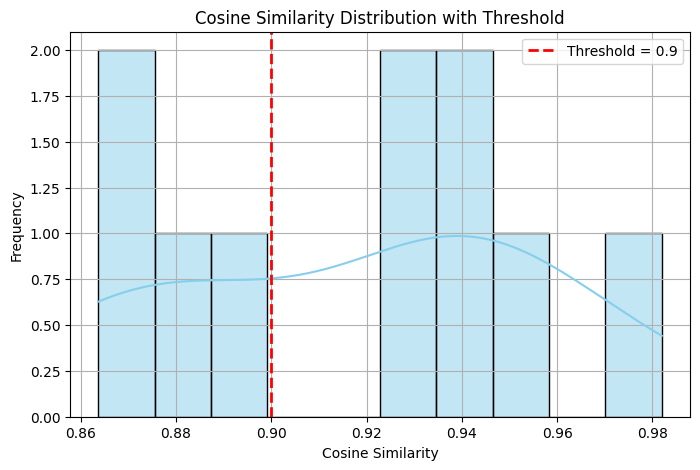

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cosine similarity scores
similarity_scores = pair_similarities  # your similarity list
threshold = 0.9

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(similarity_scores, bins=10, kde=True, color="skyblue", edgecolor="black")

# Add threshold line
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold = {threshold}')

# Labels and formatting
plt.title("Cosine Similarity Distribution with Threshold")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### 🔥 Heatmap of Pairwise Cosine Similarities

The heatmap below shows the pairwise cosine similarity between all sentence embeddings based on their `[CLS]` representations from BERT. Each cell in the matrix indicates the cosine similarity between two sentence pairs.

- Brighter (redder) colors indicate higher similarity values.
- Darker (bluer) colors indicate lower similarity values.

The heatmap helps us visually explore the semantic relationships across all sentence pairs:
- Strong diagonal dominance implies high self-similarity (as expected).
- Off-diagonal patterns can highlight groups of sentence pairs that are semantically close to one another.

This tool is valuable for identifying clusters, anomalies, or mislabeled data and complements the distribution plot by offering a comparative, grid-level view.

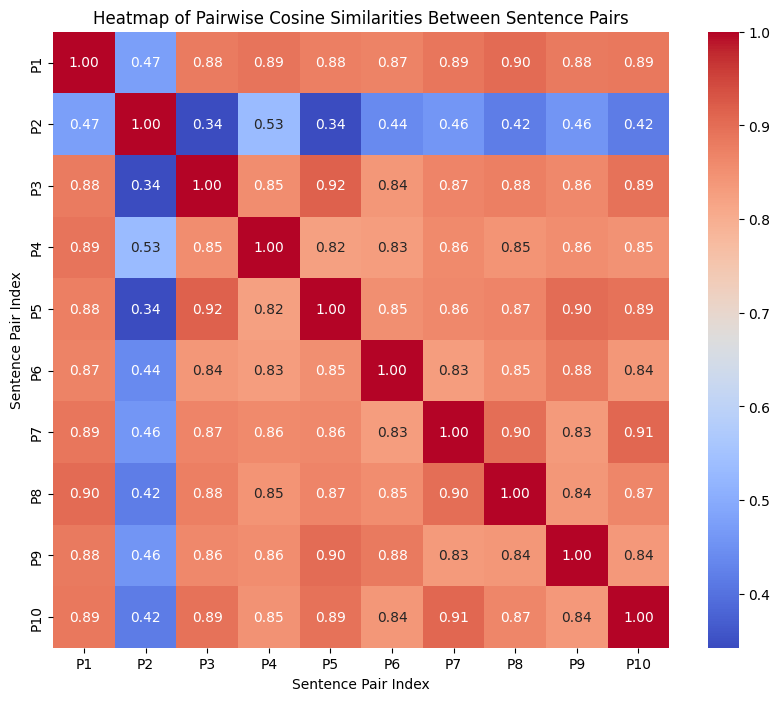

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a matrix of similarities for visualization (10x10)
similarity_matrix = np.zeros((len(sentence_pairs), len(sentence_pairs)))
for i in range(len(sentence_pairs)):
    for j in range(len(sentence_pairs)):
        vec_i = tf.reshape(cls_embeddings[i], (1, -1))
        vec_j = tf.reshape(cls_embeddings[j], (1, -1))
        sim = cosine_similarity(vec_i, vec_j)[0][0]
        similarity_matrix[i][j] = sim

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            xticklabels=[f"P{i+1}" for i in range(len(sentence_pairs))],
            yticklabels=[f"P{i+1}" for i in range(len(sentence_pairs))])
plt.title("Heatmap of Pairwise Cosine Similarities Between Sentence Pairs")
plt.xlabel("Sentence Pair Index")
plt.ylabel("Sentence Pair Index")
plt.show()